In [70]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [71]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [72]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [73]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [74]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\movee\AppData\Local\Temp\ipykernel_23588\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [75]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [76]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [77]:
# Create our session (link) from Python to the DB
session = Session(engine)
connection = engine.connect()


# Exploratory Precipitation Analysis

In [78]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc())[0]
print(f"most recent date is:{recent_date}")

most recent date is:('2017-08-23',)


date one year from last recorded date: 2016-08-23


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (1).

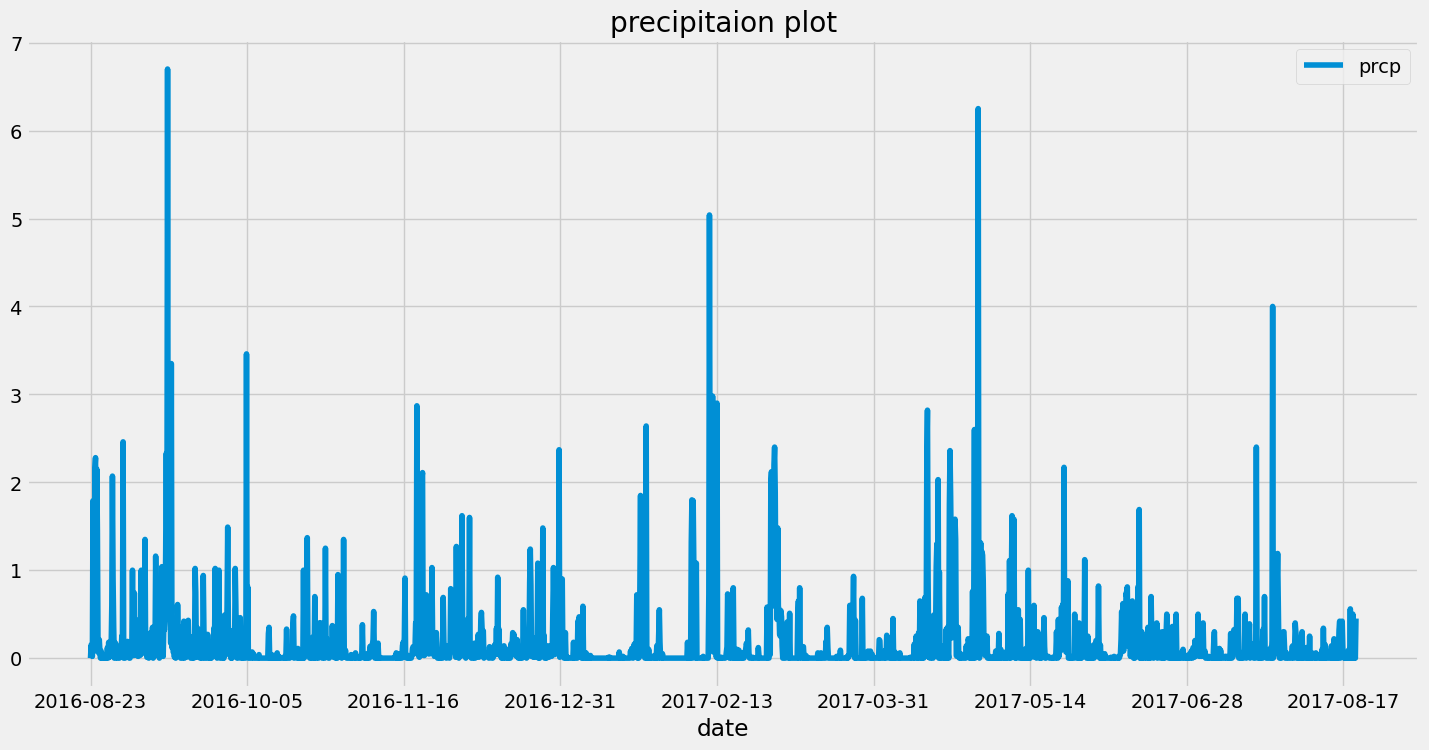

In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year = timedelta(days=365)
one_year_date = dt.date(2017,8,23) - year
print(f"date one year from last recorded date: {one_year_date}")


# Perform a query to retrieve the data and precipitation scores
percp = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23'). order_by(Measurement.date).all()
perp_df = pd.DataFrame(percp)
perp_df.head()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

perp_df = perp_df.set_index("date")
perp_df = perp_df.dropna(how="any")

# Sort the dataframe by date
perp_df = perp_df.sort_values("date")
perp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
ax = perp_df.plot(figsize=(16,8))
plt.title('precipitaion plot')
ax.set_xticklabels(" ")
ax.set_xlabel("date")


In [53]:
# Use Pandas to calculate the summary statistics for the precipitation data
perp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number of stations in the dataset
nb_station = session.query(Station).count()
print("Total Number of Stations in database:", nb_station)

Total Number of Stations in database: 9


In [69]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
act_stat = session.query(Measurement.station, Measurement.tobs)
act_stat_df = pd.DataFrame(act_stat).groupby("Station").count().sort_values(by=["tobs"], ascending=False)
act_stat_df.head()

KeyError: 'Station_id'

In [80]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station281 = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.station == "USC00519281")
station281 = pd.DataFrame(station281)
station281.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_station = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.station == "USC00519281", Measurement.date > "2016-08-23")
year_temp = pd.DataFrame(year_station)
year_temp.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


# Close Session

In [51]:
# Close Session
session.close()